<a href="https://colab.research.google.com/github/karumugamio/NLAProjEnglishtoSimpleEnglishMT/blob/master/Analysis_of_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of Data


*   Reference : https://opendatascience.com/exploratory-data-analysis-for-natural-language-processing-a-complete-guide-to-python-tools/?utm_campaign=Learning%20Posts&utm_content=126886257&utm_medium=social&utm_source=linkedin&hss_channel=lcp-9358547
*   Second



In [51]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [52]:
import os
import pandas as pd
import numpy as np

os.chdir('/gdrive/My Drive/NLAProjectWS/EDA')
print(os.listdir())
input_simple = '/gdrive/My Drive/NLAProjectWS/Data/v1_wiki.simple'
input_en = '/gdrive/My Drive/NLAProjectWS/Data/v1_wiki.unsimplified'

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

['3000 Sentence Pair.zip', '3000 Sentence Pair']


In [53]:
import pandas as pd
en_dataset=pd.read_csv(input_en,delimiter="\n",header=None,names = ['enSrc'])
simple_dataset = pd.read_csv(input_simple,delimiter="\n",header = None,names = ['simpleSrc'])

print(en_dataset.info())
print(simple_dataset.info())

### Print Head to Check the file
print(en_dataset.head())
print(simple_dataset.head())

src_df = en_dataset.copy()
src_df['simpleSrc'] = simple_dataset['simpleSrc']
print(src_df.info())
print(src_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137362 entries, 0 to 137361
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   enSrc   137362 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137362 entries, 0 to 137361
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   simpleSrc  137362 non-null  object
dtypes: object(1)
memory usage: 1.0+ MB
None
                                               enSrc
0  When Green tore his ACL in a preseason game , ...
1  Royal Rumble was the twentieth annual Royal Ru...
2  Janko Prunk is a Slovenian historian of modern...
3  Sometimes the balalaika is tuned `` guitar sty...
4  Two days after he was sworn in as Prime Minist...
                                           simpleSrc
0  Warner was the backup quarterback for the St. ...
1  Royal Rumble was the twentieth y

Analyzing text statistics of English and Simple English Sentence aligned data set

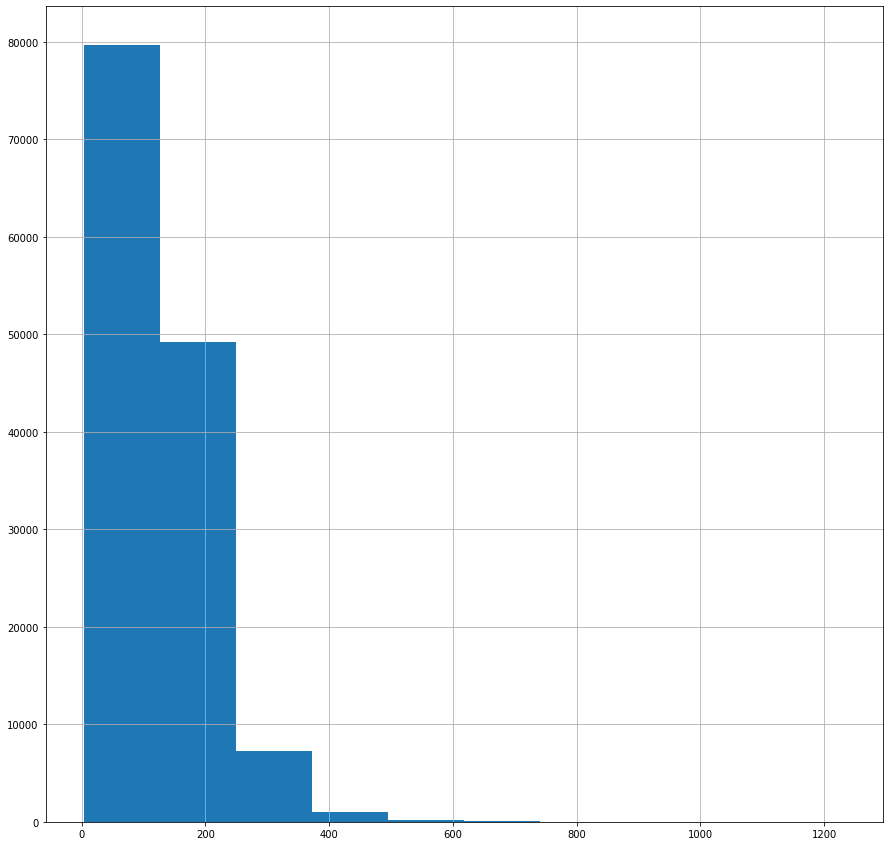

In [54]:
# Sentence length Distribution 
# character count stats
src_df['enSrc'].str.len().hist()

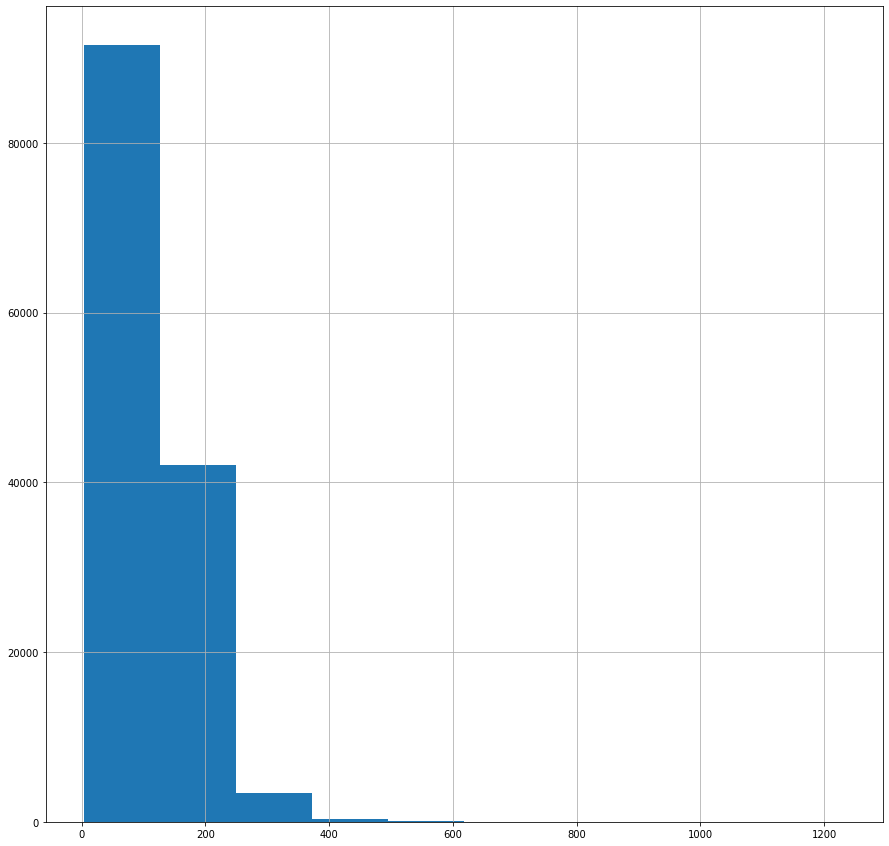

In [55]:
src_df['simpleSrc'].str.len().hist()

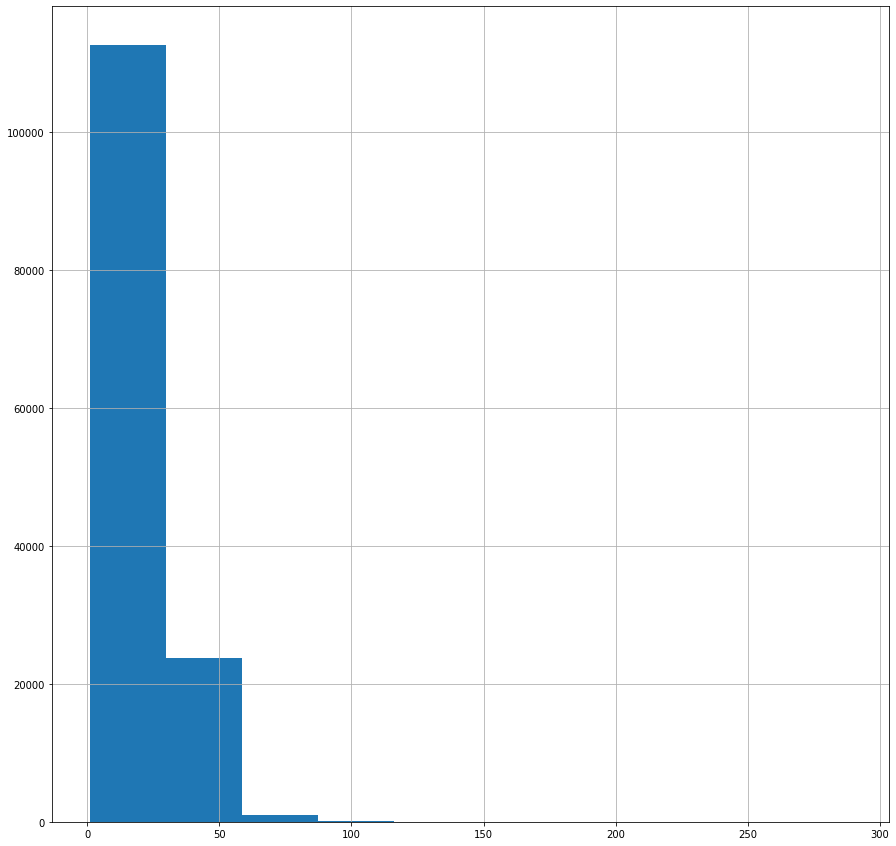

In [56]:
# character count stats
src_df['simpleSrc'].str.split().map(lambda x: len(x)).hist()

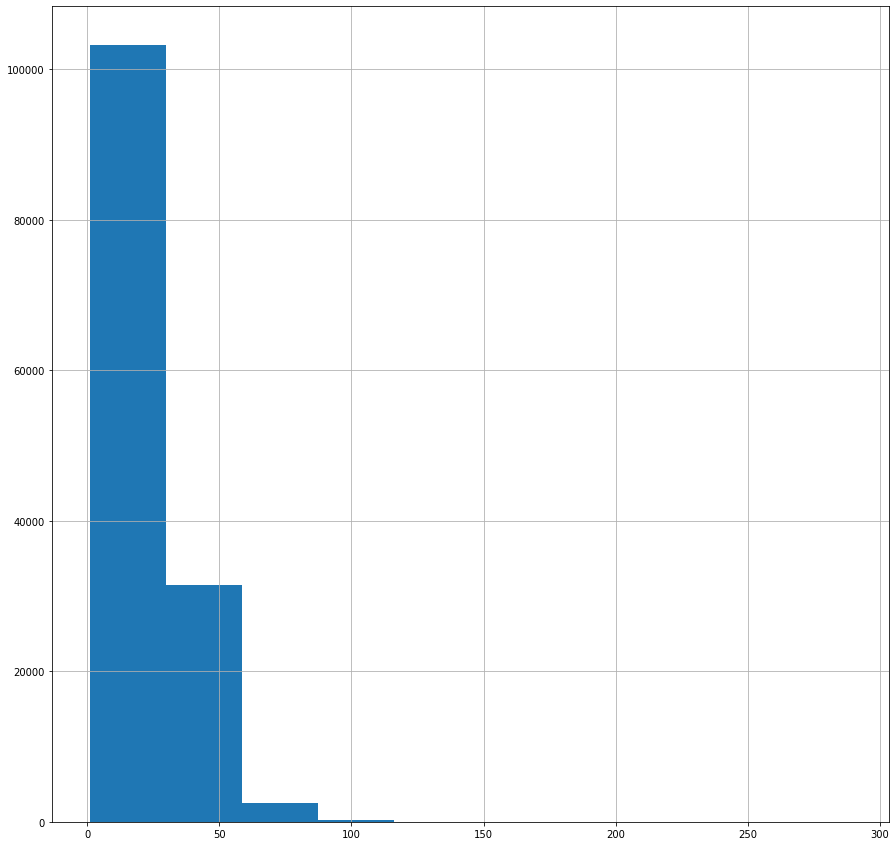

In [57]:
src_df['enSrc'].str.split().map(lambda x: len(x)).hist()

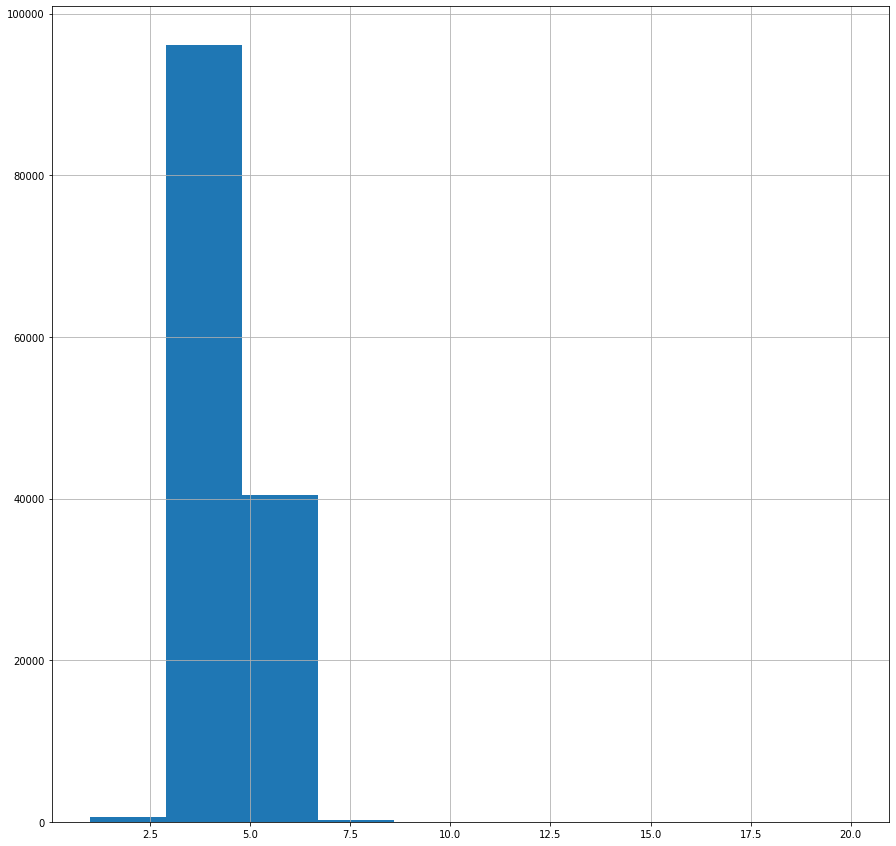

In [58]:
#average word length
src_df['enSrc'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

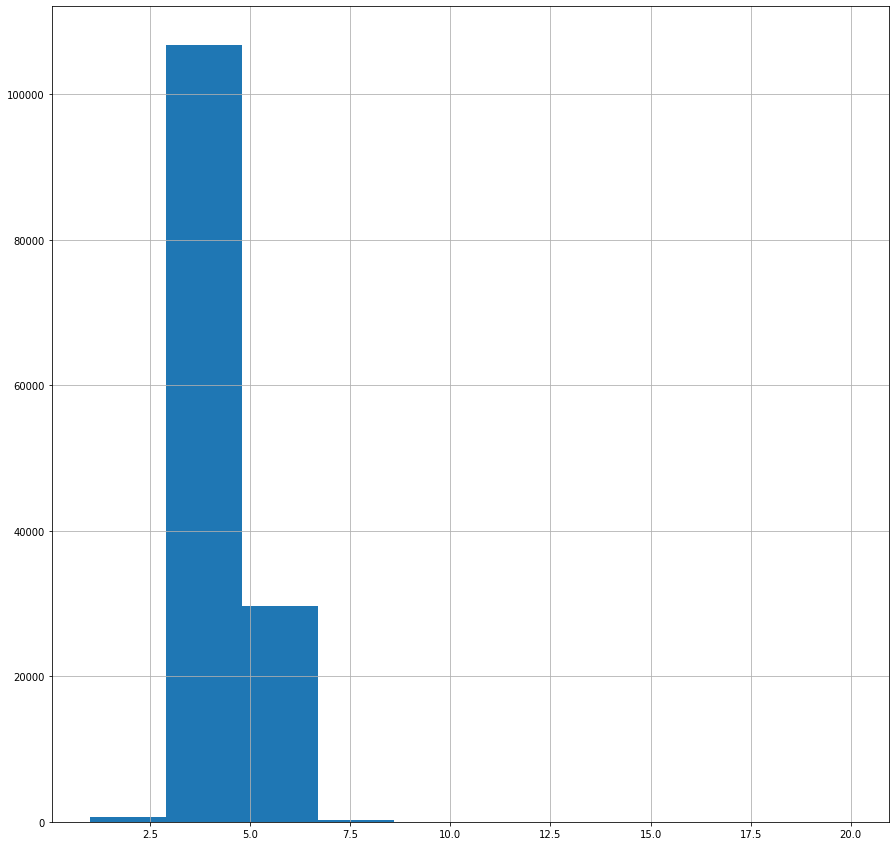

In [59]:
src_df['simpleSrc'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [60]:
#Stop word analysis
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 50 artists>

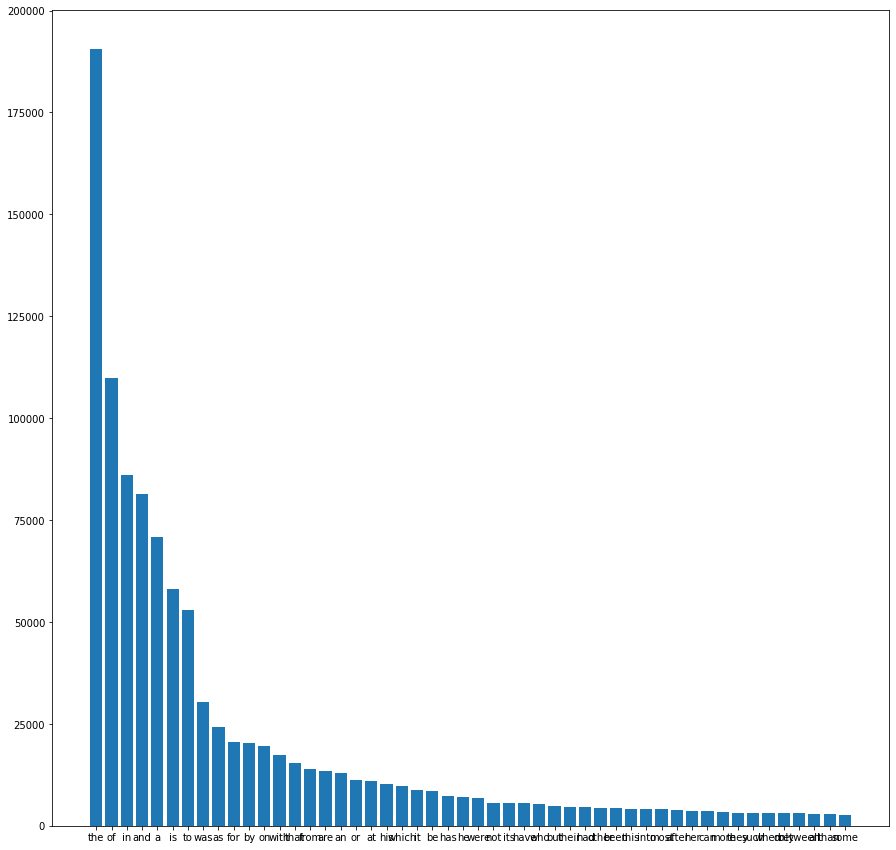

In [78]:
corpus=[]
new= src_df['enSrc'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]


from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1


import matplotlib.pyplot as plt
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:50] 
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 50 artists>

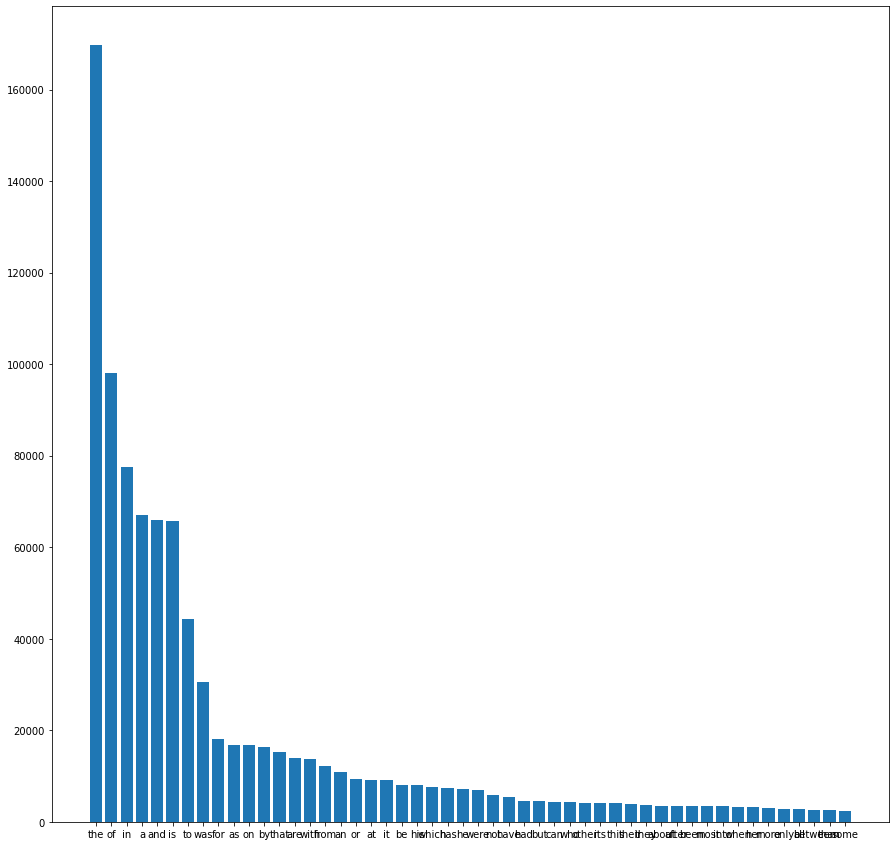

In [77]:
corpus=[]
new= src_df['simpleSrc'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]


from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1


import matplotlib.pyplot as plt
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:50] 
x,y=zip(*top)
plt.bar(x,y)
#sns.barplot(x=x,y=y)

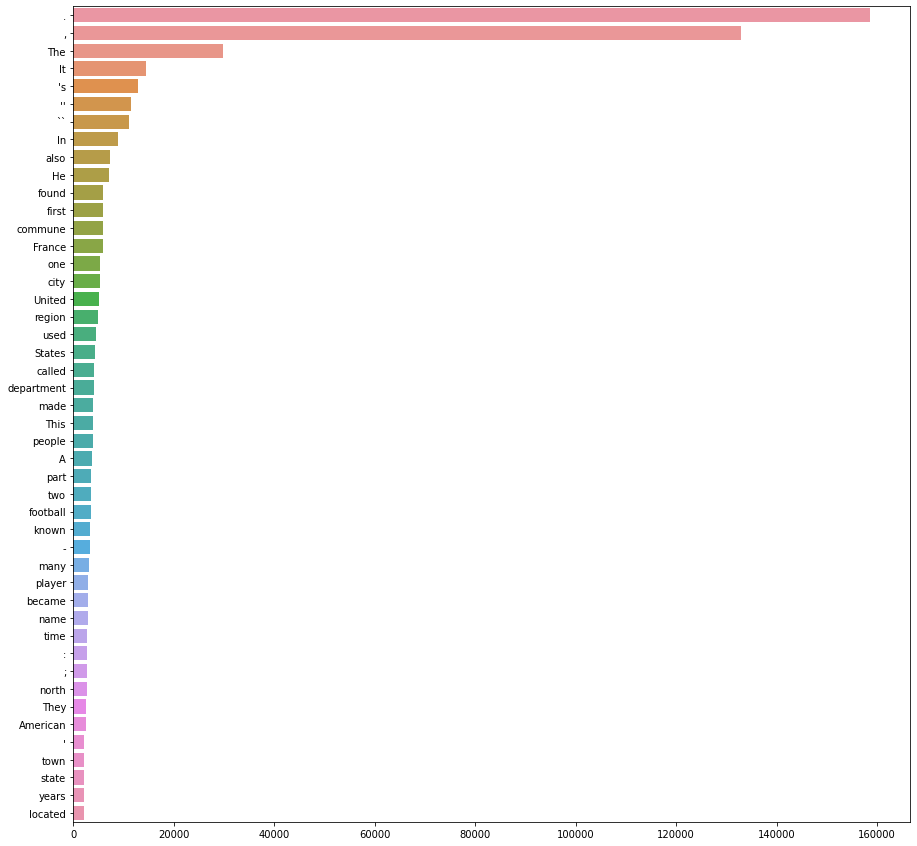

In [63]:
import seaborn as sns
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:100]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

N-Gram Exploration

In [0]:

from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

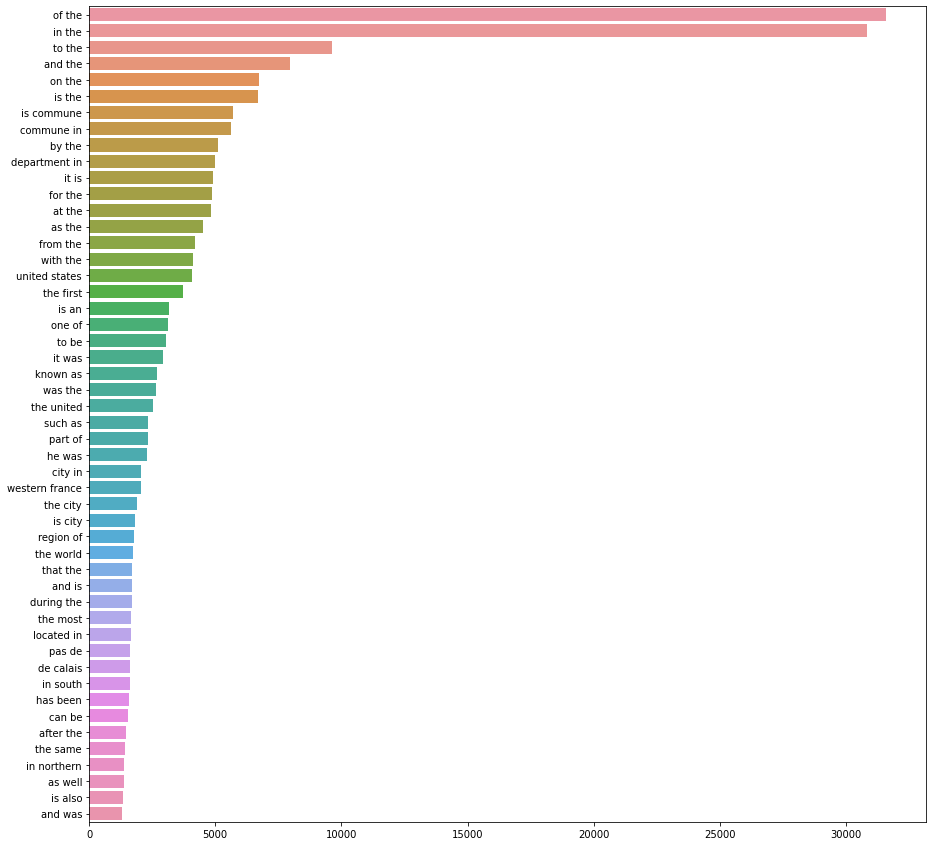

In [68]:
top_n_bigrams=get_top_ngram(src_df['enSrc'],2)[:50]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

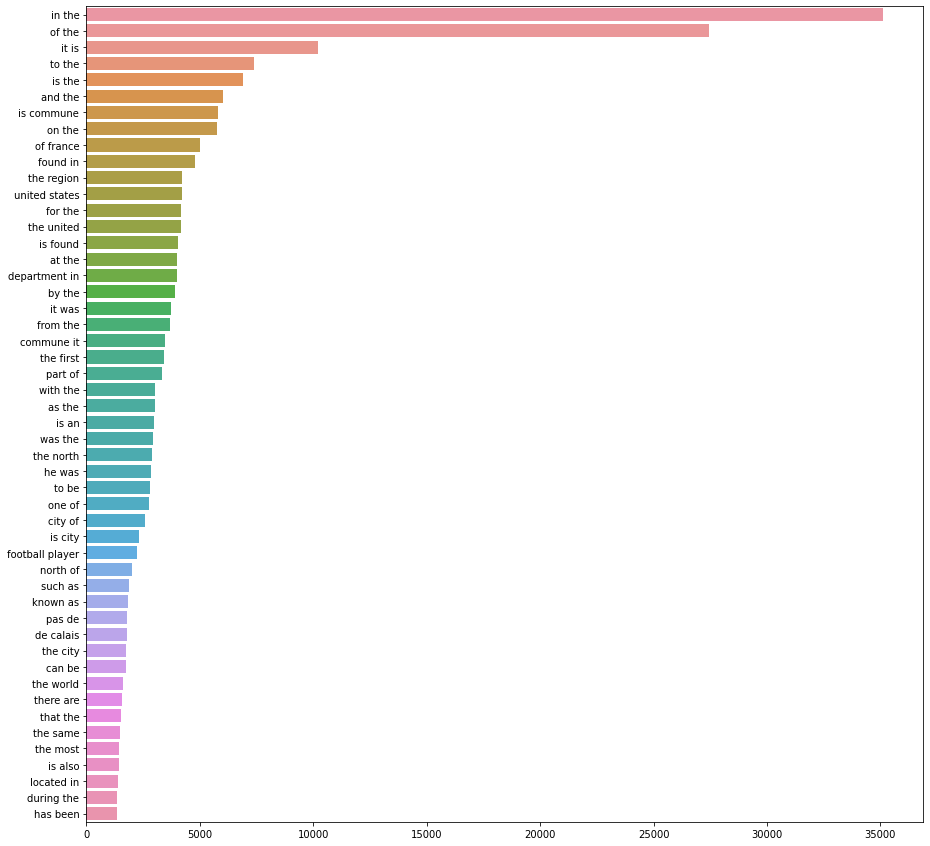

In [69]:
top_n_bigrams=get_top_ngram(src_df['simpleSrc'],2)[:50]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

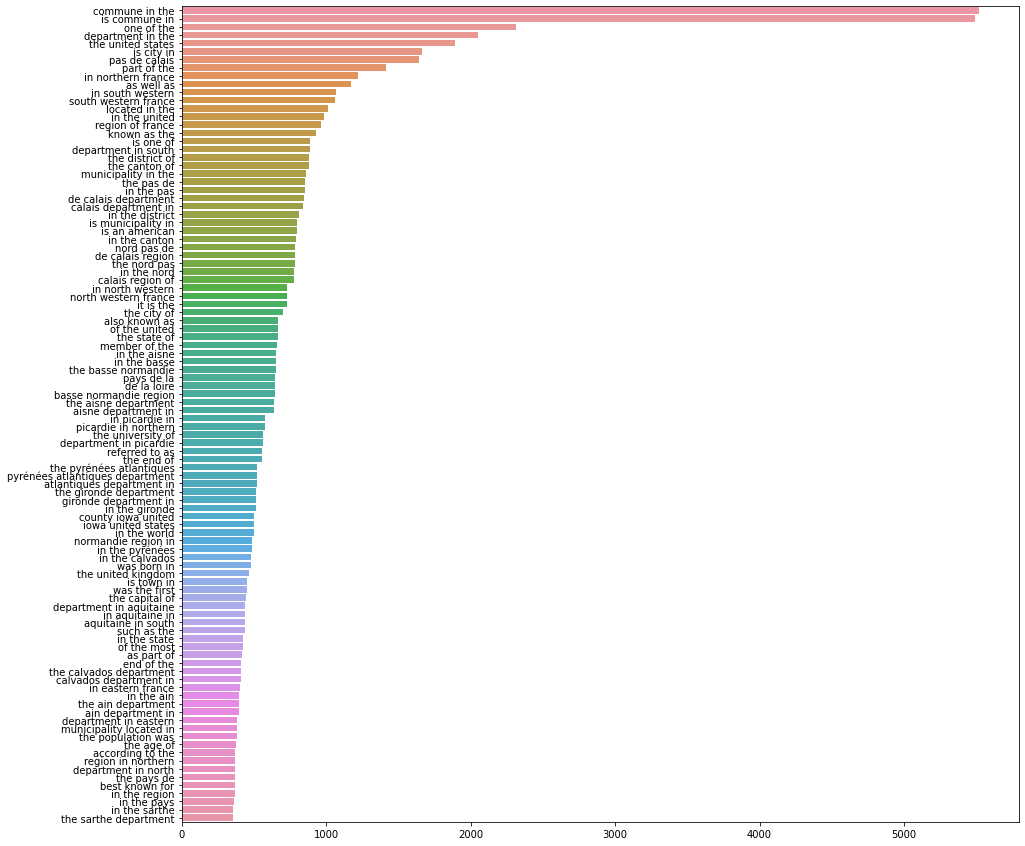

In [73]:
# Top TriGram
top_tri_grams=get_top_ngram(src_df['enSrc'],n=3)[:100]
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

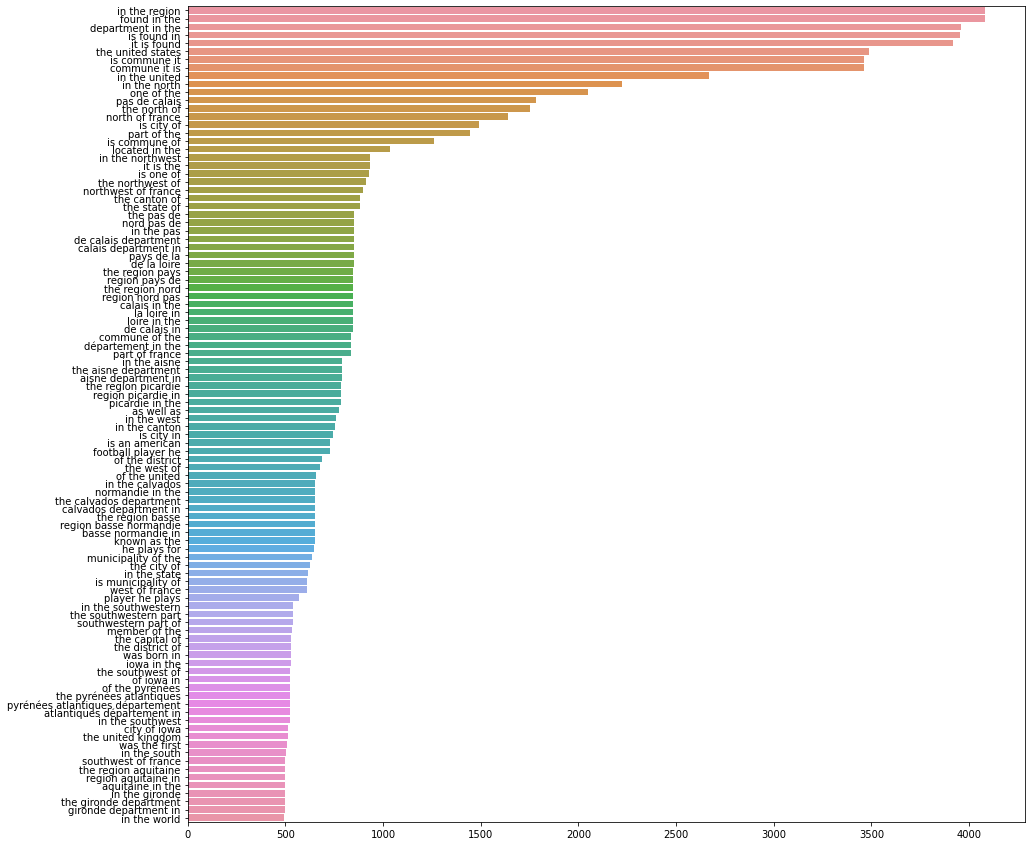

In [74]:
# Top TriGram
top_tri_grams=get_top_ngram(src_df['simpleSrc'],n=3)[:100]
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)